In [35]:
import shutil

source_file_path = '.\..\.env'

destination_file_path = '.'

shutil.copy(source_file_path, destination_file_path)

'.\\.env'

In [36]:
from datetime import datetime 
import pandas as pd
import numpy as np
from dotenv import dotenv_values
from bingx.api import BingxAPI

config = dotenv_values(".env")


API_KEY = config["API_KEY"]
SECRET_KEY = config["SECRET_KEY"]

bingx =  BingxAPI(API_KEY, SECRET_KEY, timestamp="local")

In [37]:
# RSI chatgpt (not work)

def calculate_rsi(data, period=14):
    df = pd.DataFrame(data)
    df['close'] = pd.to_numeric(df['close'], errors='coerce')
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    
    # Adjust the rolling mean calculation for small sample sizes
    avg_gain = gain.rolling(window=min(len(gain), period), min_periods=1).mean()
    avg_loss = loss.rolling(window=min(len(loss), period), min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Example data

res = []
data = bingx.get_kline_data("BTC-USDT","1h" ,1716478063000 ,1719156463000, 1440)
res += list(reversed(data))

rsi_values = calculate_rsi(res)
print(rsi_values)



0            NaN
1       0.000000
2       0.000000
3       0.000000
4      48.897747
         ...    
740    54.159825
741    52.857906
742    28.193219
743    24.904267
744    16.299148
Name: close, Length: 745, dtype: float64


In [38]:
# RSI https://github.com/lukaszbinden/rsi_tradingview/blob/main/rsi.py (Worked!! Nice)
def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
    """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
        The TradingView code is as follows:
        //@version=4
        study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
        len = input(14, minval=1, title="Length")
        src = input(close, "Source", type = input.source)
        up = rma(max(change(src), 0), len)
        down = rma(-min(change(src), 0), len)
        rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
        plot(rsi, "RSI", color=#8E1599)
        band1 = hline(70, "Upper Band", color=#C0C0C0)
        band0 = hline(30, "Lower Band", color=#C0C0C0)
        fill(band1, band0, color=#9915FF, transp=90, title="Background")

    :param ohlc:
    :param period:
    :param round_rsi:
    :return: an array with the RSI indicator values
    """
    df['close'] = pd.to_numeric(df['close'], errors='coerce')
    delta = ohlc["close"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi




start_timestamp = 1720688771000
# start_timestamp = 1704122863000
current_timestamp = int(datetime.now().timestamp() * 1000)
bool = True
res = []
while bool:
    data = list(bingx.get_kline_data("BTC-USDT","1h" ,start_timestamp ,limit= 1440))
    
    start_timestamp = data[0]['time'] + 1
    res += list(reversed(data))
    
    if len(data) < 1440: 
        break

df = pd.DataFrame(res)

# print(df.__len__())
df['close'] = pd.to_numeric(df['close'], errors='coerce')
array_list = rsi_tradingview(df)
b = array_list.tolist()
# convertToJsonFile(b, "rsi-BTC", ".") 
# convertToJsonFile(res, "BTC-ohlc", ".") 
# json.dump(b, codecs.open("test.json", 'w', encoding='utf-8'), 
#           separators=(',', ':'), 
#           sort_keys=True, 
#           indent=4)
# json.dump(res, codecs.open("test1.json", 'w', encoding='utf-8'), 
#           separators=(',', ':'), 
#           sort_keys=True, 
#           indent=4)
# 




In [39]:
# # 1
# # Thursday, July 25, 2024 12:00:00 AM
# start_timestamp = 1721853000000 
# # Sunday, July 28, 2024 12:00:00 AM
# end_timestamp = 1722692200000 


# # 3 range
# # Saturday, June 15, 2024 12:01:00 AM
# start_timestamp = 1718397060000 
# # Monday, June 17, 2024 9:31:00 AM
# end_timestamp = 1718604060000 

# 4 up
# start_timestamp = 1720770670000 
# end_timestamp = 1722239470000 

# 5 down
start_timestamp = 1722259816000 
end_timestamp = 1722821416000 


# 2
# Thursday, June 13, 2024 4:00:00 PM
# start_timestamp = 1718281800000 
# Thursday, June 20, 2024 2:00:00 PM
# end_timestamp = 1718879400000 



current_timestamp = int(datetime.now().timestamp() * 1000)
bool = True
res = []
while bool:
    data = list(bingx.get_kline_data("BTC-USDT","1h" ,start_timestamp, end_timestamp=end_timestamp ,limit= 1440))
    
    res += list(reversed(data))
    
    if len(data) < 1440: 
        break

    start_timestamp = data[0]['time'] + 1



In [40]:
df = pd.DataFrame(res)

# print(len(res))
# print(res[0])


# print(res[len(res)-2])


# print(len(df))
res


[{'open': '69257.9',
  'close': '68199.0',
  'high': '69291.6',
  'low': '68033.0',
  'volume': '7797.46',
  'time': 1722261600000},
 {'open': '68199.0',
  'close': '68065.9',
  'high': '68281.1',
  'low': '67634.6',
  'volume': '6075.56',
  'time': 1722265200000},
 {'open': '68066.0',
  'close': '66905.9',
  'high': '68093.4',
  'low': '66770.7',
  'volume': '7538.05',
  'time': 1722268800000},
 {'open': '66906.8',
  'close': '66974.2',
  'high': '67135.4',
  'low': '66376.6',
  'volume': '5462.71',
  'time': 1722272400000},
 {'open': '66974.5',
  'close': '67383.9',
  'high': '67497.8',
  'low': '66900.5',
  'volume': '2771.05',
  'time': 1722276000000},
 {'open': '67383.9',
  'close': '67269.1',
  'high': '67512.3',
  'low': '67201.9',
  'volume': '1108.51',
  'time': 1722279600000},
 {'open': '67272.5',
  'close': '67338.7',
  'high': '67361.8',
  'low': '67111.9',
  'volume': '681.00',
  'time': 1722283200000},
 {'open': '67338.6',
  'close': '67454.8',
  'high': '67471.1',
  'low

157 157
-57.93784723298934


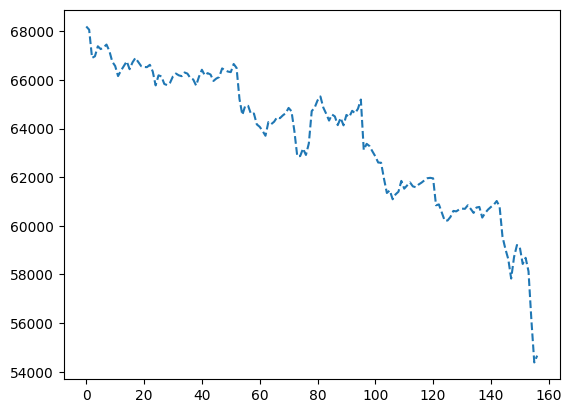

-57.93784723298934
68154.41323067002


In [41]:
import matplotlib.pyplot as plt
import numpy as np

y = df['close'] = pd.to_numeric(df['close'], errors='coerce')
x = [i for i in range(0, len(y))]

# x = df['time'] = pd.to_numeric(df['time'], errors='coerce')
# x = x/1000
# print(x)
print(len(x), len(y))
slope, intercept = np.polyfit(x, y, 1)
print(slope)
plt.plot(x, y, '--')
plt.show()

print(slope )
print(intercept )

-0.05793784723298927
54.662 156 68.199 0
Equation of the trendline: y = -0.06x + 68.15


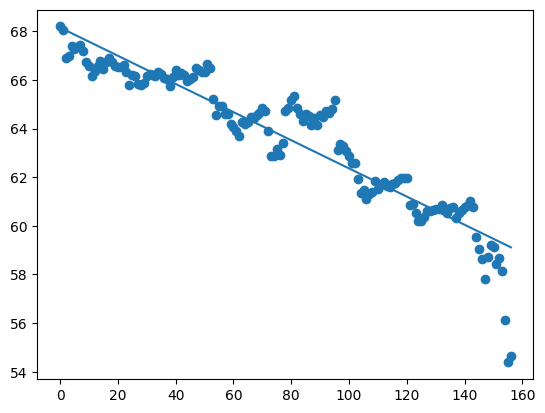

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#define data
y = df['close'] = pd.to_numeric(df['close'], errors='coerce')
x = np.arange(len(y))

y = y/1000
#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

# angle_rad = np.arctan(-17.258)
# angle_deg = np.degrees(angle_rad)
# print(f"Angle of the slope: {angle_deg} degrees")
print(z[0])
# print((y[len(y)-1] - y[0])/ (x[-1] - x[0]))
print(y[len(y)-1] , x[-1],y[0] , x[0])
print(f"Equation of the trendline: y = {z[0]:.2f}x + {z[1]:.2f}")
plt.show()


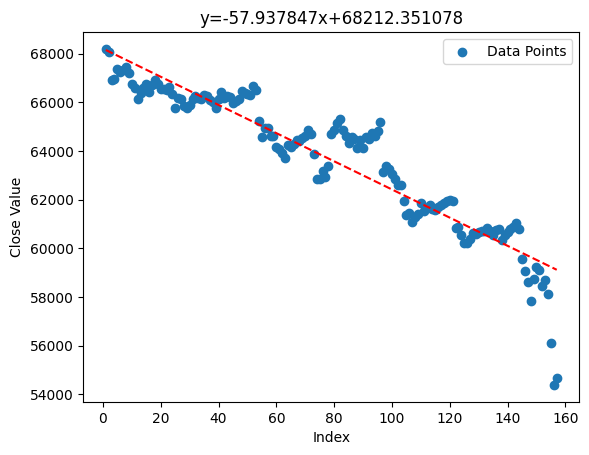

y = -57.94x + 68212.35


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is a DataFrame and 'close' is one of its columns
# Replace this line with your DataFrame definition


# Convert 'close' to numeric, ignoring errors
y = pd.to_numeric(df['close'], errors='coerce')
x = [i for i in range(1, len(y)+1)]

# Create scatterplot
plt.scatter(x, y, label='Data Points')

# Calculate equation for trendline
z = np.polyfit(x, y, 1)  # Returns coefficients [slope, intercept]
p = np.poly1d(z)

# Add trendline to plot
plt.plot(x, p(x),"r--", )
plt.title("y=%.6fx+%.6f"%(z[0],z[1])) 
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Close Value')

plt.legend()

# Display the plot
plt.show()
print(f"y = {z[0]:.2f}x + {z[1]:.2f}")

In [44]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df is a DataFrame and 'close' is one of its columns
# # Replace this line with your DataFrame definition


# # Convert 'close' to numeric, ignoring errors
# y = [2,4,6,8,10,12,14]
# x = [i for i in range(1, len(y)+1)]

# # Create scatterplot
# plt.scatter(x, y, label='Data Points')

# # Calculate equation for trendline
# z = np.polyfit(x, y, 1)  # Returns coefficients [slope, intercept]
# p = np.poly1d(z)

# # Add trendline to plot
# plt.plot(x, p(x),"r--", )
# plt.title("y=%.6fx+%.6f"%(z[0],z[1])) 
# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Close Value')

# plt.legend()

In [45]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the function
# def equation(x):
#     return -17.26 * x + 68003.82

# # Generate x values (for example, from 0 to 4000)
# x_values = np.linspace(0, 200)
# y_values = equation(x_values)

# # Plotting the equation
# plt.figure(figsize=(10, 6))
# plt.plot(x_values, y_values, label='y = -17.26x + 68003.82', color='blue')

# # Adding title and labels
# plt.title('Plot of the equation y = -17.26x + 68003.82')
# plt.xlabel('x')
# plt.ylabel('y')

# # Show the grid
# plt.grid(True)

# # Display the legend
# plt.legend()

# # Show the plot
# plt.show()


In [46]:
# import json

# with open('test.json') as f:
#     d = json.load(f)
#     print(d)

C:\Users\F07\AppData\Local\Temp\ipykernel_13428\4124993453.py:19: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  df_dx = derivative(f, x_fake, dx=1e-6)


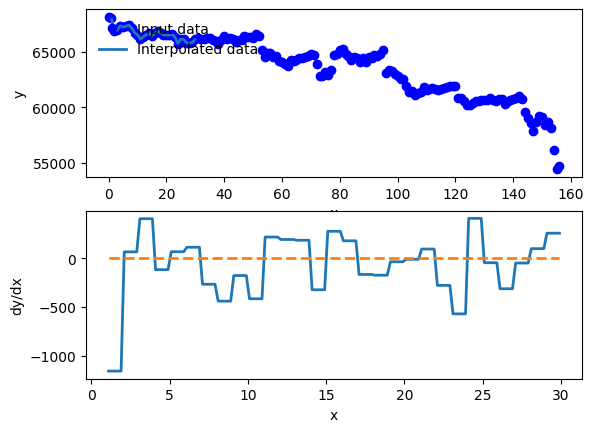

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative


y = df['close'] = pd.to_numeric(df['close'], errors='coerce')
x = np.arange(len(y))
# x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,\
#               16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
# y = np.array([2,5,7,9,10,13,16,18,21,22,21,20,19,18,\
#               17,14,10,9,7,5,7,9,10,12,13,15,16,17,22,27])

# Simple interpolation of x and y    
f = interp1d(x, y)
x_fake = np.arange(1.1, 30, 0.1)

# derivative of y with respect to x
df_dx = derivative(f, x_fake, dx=1e-6)

# Plot
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.errorbar(x, y, fmt="o", color="blue", label='Input data')
ax1.errorbar(x_fake, f(x_fake), label="Interpolated data", lw=2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.errorbar(x_fake, df_dx, lw=2)
ax2.errorbar(x_fake, np.array([0 for i in x_fake]), ls="--", lw=2)
ax2.set_xlabel("x")
ax2.set_ylabel("dy/dx")

leg = ax1.legend(loc=2, numpoints=1,scatterpoints=1)
leg.draw_frame(False)

In [48]:
import pandas as pd
import numpy as np

def determine_trend(df, period=50):
    """
    Determine the trend of a market based on the moving average and slope.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the OHLC data.
    period (int): Period for the moving average.

    Returns:
    str: 'Uptrend', 'Downtrend', or 'Sideways'
    """

    if len(df) < period:
        raise ValueError("Not enough data points to calculate the moving average for the given period.")

    # Calculate the moving average
    df['MA'] = df['close'].rolling(window=period).mean()

    # Calculate the slope (using linear regression on the last 'period' points)
    df['slope'] = np.polyfit(range(period), df['close'].tail(period), 1)[0]

    # Determine the trend
    if df['slope'].iloc[-1] > 0 and df['close'].iloc[-1] > df['MA'].iloc[-1]:
        return 'Uptrend'
    elif df['slope'].iloc[-1] < 0 and df['close'].iloc[-1] < df['MA'].iloc[-1]:
        return 'Downtrend'
    else:
        return 'Sideways'

# Example usage:
# Assuming df is your DataFrame containing the OHLC data with a 'Close' column
# df = pd.read_csv('BTC_OHLC_data.csv')  # Example of loading data

# Example with a 30-period moving average
trend = determine_trend(df, period=50)
print(f"The current trend is: {trend}")
df


The current trend is: Downtrend


,open,close,high,low,volume,time,MA,slope
0,69257.9,68199.0,69291.6,68033.0,7797.46,1722261600000,NaN,-93.552259
1,68199.0,68065.9,68281.1,67634.6,6075.56,1722265200000,NaN,-93.552259
2,68066.0,66905.9,68093.4,66770.7,7538.05,1722268800000,NaN,-93.552259
3,66906.8,66974.2,67135.4,66376.6,5462.71,1722272400000,NaN,-93.552259
4,66974.5,67383.9,67497.8,66900.5,2771.05,1722276000000,NaN,-93.552259
...,...,...,...,...,...,...,...,...
152,58434.0,58685.2,59093.0,58354.4,1649.52,1722808800000,60679.872,-93.552259
153,58686.3,58129.5,58734.4,57966.0,1512.08,1722812400000,60603.712,-93.552259
154,58132.7,56122.1,58280.3,55659.6,8523.61,1722816000000,60499.128,-93.552259
155,56122.2,54380.7,56261.9,52207.1,18115.67,1722819600000,60357.588,-93.552259
